/var/folders/tn/8dx8j7jn26q_ckdsfpq25f540000gn/T/ipykernel_14507/3287498285.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="dataset", y="gain", data=combined_df, order=dataset_order, palette=palette)
/var/folders/tn/8dx8j7jn26q_ckdsfpq25f540000gn/T/ipykernel_14507/3287498285.py:46: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.boxplot(x="dataset", y="gain", data=combined_df, order=dataset_order, palette=palette)
/var/folders/tn/8dx8j7jn26q_ckdsfpq25f540000gn/T/ipykernel_14507/3287498285.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


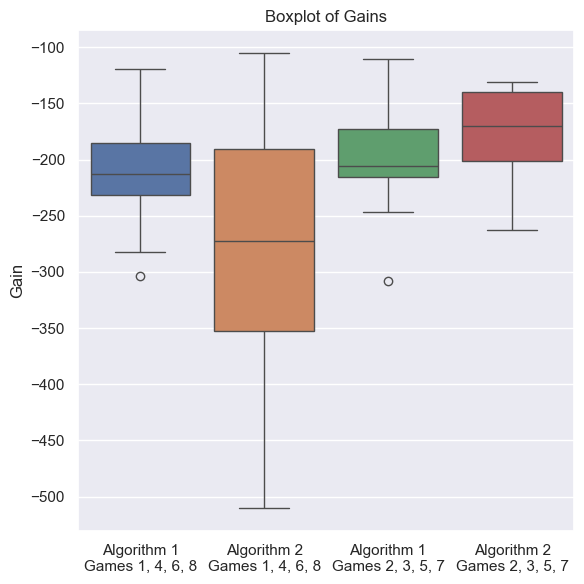

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set_theme() #optional: set seaborn theme
results_folder = "results"

if not os.path.exists(results_folder):
    print(f"Error: The folder '{results_folder}' does not exist.")
    exit()

csv_files = [f for f in os.listdir(results_folder) if f.endswith('.csv')]

if not csv_files:
    print("Error: No CSV files found in the results folder.")
    exit()

combined_data = []
dataset_names = []

for file in csv_files:
    filepath = os.path.join(results_folder, file)
    try:
        df = pd.read_csv(filepath)
        df['dataset'] = file
        combined_data.append(df)
        dataset_names.append(file)
    except (pd.errors.EmptyDataError, pd.errors.ParserError, KeyError) as e:
        print(f"Warning: Error processing '{file}': {e}. Skipping.")
        continue


if not combined_data:
    print("Error: No usable data found in the CSV files.")
    exit()

combined_df = pd.concat(combined_data)

#Customize order, names, and colors
dataset_order = ['alg1_1468.csv', 'alg2_1468.csv', 'alg1_2357.csv', 'alg2_2357.csv'] #Replace with your desired order.  Must match filenames.
dataset_labels = ['', 'Algorithm 1, Games 1, 4, 6, 8', 'Dataset C', 'Dataset D'] #Replace with your desired labels
palette = sns.color_palette() #Or any other color palette from Seaborn, Matplotlib, or a custom list.


plt.figure(figsize=(6, 6))
ax = sns.boxplot(x="dataset", y="gain", data=combined_df, order=dataset_order, palette=palette)
plt.xlabel("")
plt.ylabel("Gain")
plt.title("Boxplot of Gains")

# Custom labels with a common label
xticklabels = ['Algorithm 1\nTraining Group 1', 'Algorithm 2\nTraining Group 1', 'Algorithm 1\nTraining Group 1', 'Algorithm 2\nTraining Group 1']  # Customize as needed
ax.set_xticklabels(xticklabels)



plt.tight_layout()
plt.show()